In [2]:
#Mount your drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Code

Download and save the file weight-height.csv into your drive (from https://www.kaggle.com/mustafaali96/weight-height)

With that dataset,  plot histograms, kernel density estimation and Gaussian distribution with MLE for the followings:


*   Height all
*   Height Male
*   Height Female
*   Weight all
*   Weight Male
*   Weight Female

For the histograms, you can use any module. However, you have to implement the code for the kernel density estimation and Gaussian distribution with MLE (you cannot use any specialized library to compute it.) To plot, you can use any library you want.

In [3]:
##Code here your own implementation

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

df = pd.read_csv('/content/drive/MyDrive/ML/weight-height.csv')

male = (df.Gender == 'Male')
female = (df.Gender == 'Female')

**Histogram**

Text(0.5, 1.0, 'Weight Female Histogram')

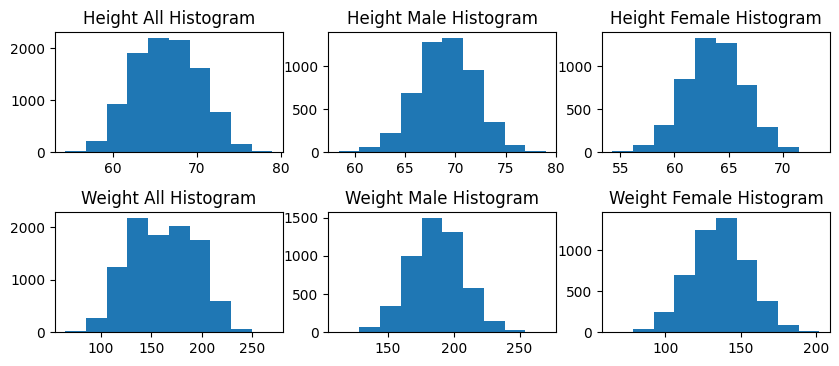

In [4]:
plt.figure(figsize=(10,3))
plt.subplots_adjust(right=0.9, top=1, bottom = 0, hspace = 0.5)

# Height All
plt.subplot(231)
plt.hist(x=df.Height)
plt.title("Height All Histogram")

# Height Male
plt.subplot(232)
plt.hist(x=df[male].Height)
plt.title("Height Male Histogram")

# Height Female
plt.subplot(233)
plt.hist(x=df[female].Height)
plt.title("Height Female Histogram")

# Weight All
plt.subplot(234)
plt.hist(x=df.Weight)
plt.title("Weight All Histogram")

# Weight Male
plt.subplot(235)
plt.hist(x=df[male].Weight)
plt.title("Weight Male Histogram")

# Weight Female
plt.subplot(236)
plt.hist(x=df[female].Weight)
plt.title("Weight Female Histogram")

**Kernel Density Estimation**

https://en.wikipedia.org/wiki/Kernel_density_estimation <br>
https://scikit-learn.org/stable/modules/density.html

In [5]:
def kernel_density_estimation(data, x, h, n):
    pdf = sum(1 / (h * n) * math.exp(-0.5 * ((x - xi) / h)**2) for xi in data)
    return pdf

In [6]:
n = len(df.Height)
x_values = np.arange(df.Height.min(), df.Height.max(),(df.Height.max()-df.Height.min())/n)
h = 1.06 * np.std(df.Height) * (len(df.Height) ** (-1 / 5))

kde_height_all = [kernel_density_estimation(df.Height, x, h, n) for x in x_values]

n = len(df[male].Height)
x_values = np.arange(df[male].Height.min(), df[male].Height.max(),(df[male].Height.max()-df[male].Height.min())/n)
h = 1.06 * np.std(df[male].Height) * (len(df[male].Height) ** (-1 / 5))

kde_height_male = [kernel_density_estimation(df[male].Height, x, h, n) for x in x_values]

n = len(df[female].Height)
x_values = np.arange(df[female].Height.min(), df[female].Height.max(),(df[female].Height.max()-df[female].Height.min())/n)
h = 1.06 * np.std(df[female].Height) * (len(df[female].Height) ** (-1 / 5))

kde_height_female = [kernel_density_estimation(df[female].Height, x, h, n) for x in x_values]


n = len(df.Weight)
x_values = np.arange(df.Weight.min(), df.Weight.max(),(df.Weight.max()-df.Weight.min())/n)
h = 1.06 * np.std(df.Weight) * (len(df.Weight) ** (-1 / 5))

kde_weight_all = [kernel_density_estimation(df.Weight, x, h, n) for x in x_values]

n = len(df[male].Weight)
x_values = np.arange(df[male].Weight.min(), df[male].Weight.max(),(df[male].Weight.max()-df[male].Weight.min())/n)
h = 1.06 * np.std(df[male].Weight) * (len(df[male].Weight) ** (-1 / 5))

kde_weight_male = [kernel_density_estimation(df[male].Weight, x, h, n) for x in x_values]

n = len(df[female].Weight)
x_values = np.arange(df[female].Weight.min(), df[female].Weight.max(),(df[female].Weight.max()-df[female].Weight.min())/n)
h = 1.06 * np.std(df[female].Weight) * (len(df[female].Weight) ** (-1 / 5))

kde_weight_female = [kernel_density_estimation(df[female].Weight, x, h, n) for x in x_values]

Text(0.5, 1.0, 'Weight Female KDE')

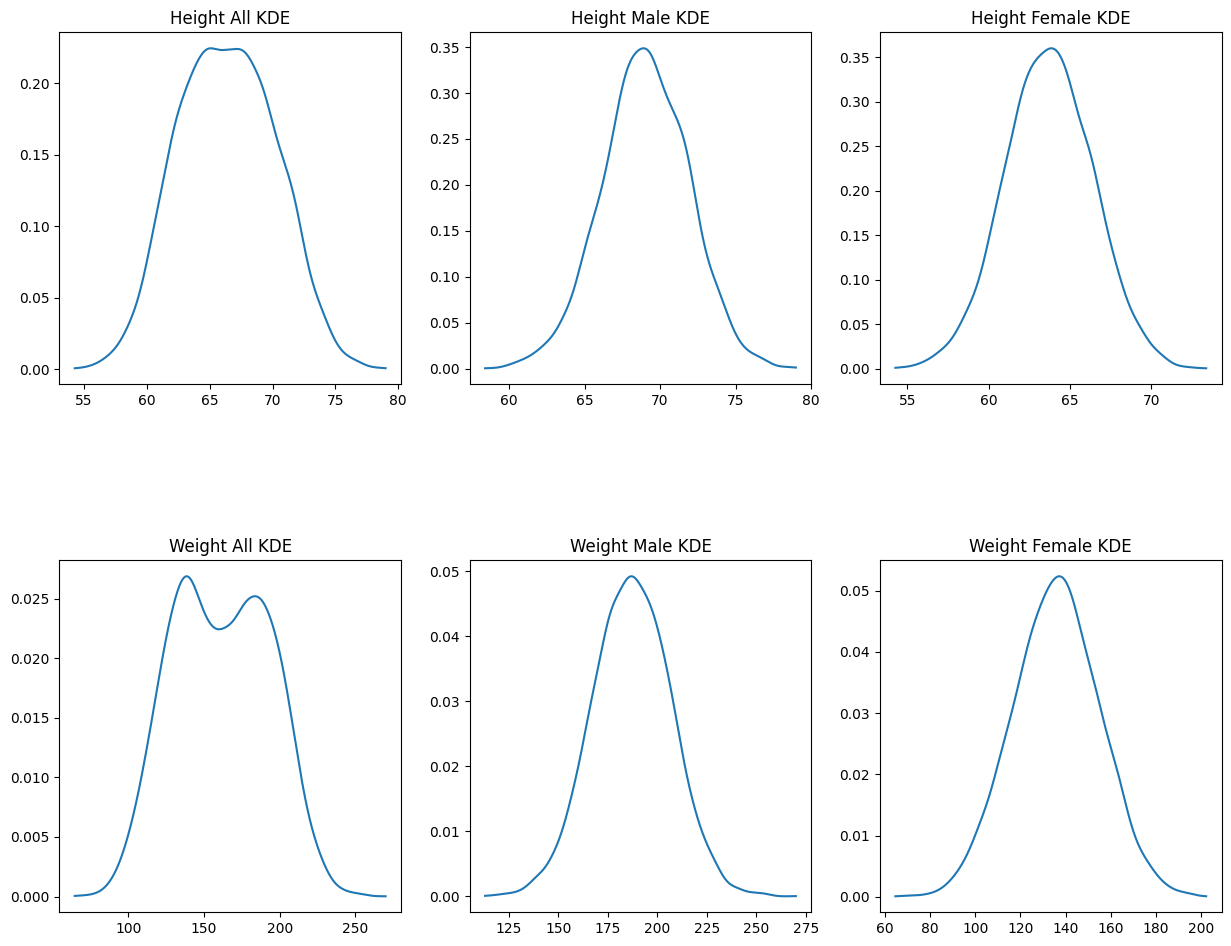

In [7]:
plt.figure(figsize=(15,10))
plt.subplots_adjust(right=0.9, bottom = 0, hspace = 0.5)

# Height All
n = len(df.Height)
x_values = np.arange(df.Height.min(), df.Height.max(),(df.Height.max()-df.Height.min())/n)

plt.subplot(231)
plt.plot(x_values, kde_height_all)
plt.title("Height All KDE")

# Height Male
n = len(df[male].Height)
x_values = np.arange(df[male].Height.min(), df[male].Height.max(),(df[male].Height.max()-df[male].Height.min())/n)

plt.subplot(232)
plt.plot(x_values, kde_height_male)
plt.title("Height Male KDE")

# Height Female
n = len(df[female].Height)
x_values = np.arange(df[female].Height.min(), df[female].Height.max(),(df[female].Height.max()-df[female].Height.min())/n)

plt.subplot(233)
plt.plot(x_values, kde_height_female)
plt.title("Height Female KDE")

# Weight All
n = len(df.Weight)
x_values = np.arange(df.Weight.min(), df.Weight.max(),(df.Weight.max()-df.Weight.min())/n)

plt.subplot(234)
plt.plot(x_values, kde_weight_all)
plt.title("Weight All KDE")

# Weight Male
n = len(df[male].Weight)
x_values = np.arange(df[male].Weight.min(), df[male].Weight.max(),(df[male].Weight.max()-df[male].Weight.min())/n)

plt.subplot(235)
plt.plot(x_values, kde_weight_male)
plt.title("Weight Male KDE")

# Weight Female
n = len(df[female].Weight)
x_values = np.arange(df[female].Weight.min(), df[female].Weight.max(),(df[female].Weight.max()-df[female].Weight.min())/n)

plt.subplot(236)
plt.plot(x_values, kde_weight_female)
plt.title("Weight Female KDE")

**Gaussian Distribution**

https://en.wikipedia.org/wiki/Normal_distribution

In [8]:
def gaussian(x, mu, sigma):
  return 1 / ( sigma * math.sqrt(2 * math.pi) ) * math.exp(-0.5 * ((x - mu) / sigma) ** 2)

In [9]:
n = len(df.Height)
x_values = np.arange(df.Height.min(), df.Height.max(),(df.Height.max()-df.Height.min())/n)
mu = np.mean(df.Height)
sigma = np.std(df.Height)

gau_height_all = [gaussian(x, mu, sigma) for x in x_values]

n = len(df[male].Height)
x_values = np.arange(df[male].Height.min(), df[male].Height.max(),(df[male].Height.max()-df[male].Height.min())/n)
mu = np.mean(df[male].Height)
sigma = np.std(df[male].Height)

gau_height_male = [gaussian(x, mu, sigma) for x in x_values]

n = len(df[female].Height)
x_values = np.arange(df[female].Height.min(), df[female].Height.max(),(df[female].Height.max()-df[female].Height.min())/n)
mu = np.mean(df[female].Height)
sigma = np.std(df[female].Height)

gau_height_female = [gaussian(x, mu, sigma) for x in x_values]

n = len(df.Weight)
x_values = np.arange(df.Weight.min(), df.Weight.max(),(df.Weight.max()-df.Weight.min())/n)
mu = np.mean(df.Weight)
sigma = np.std(df.Weight)

gau_weight_all = [gaussian(x, mu, sigma) for x in x_values]

n = len(df[male].Weight)
x_values = np.arange(df[male].Weight.min(), df[male].Weight.max(),(df[male].Weight.max()-df[male].Weight.min())/n)
mu = np.mean(df[male].Weight)
sigma = np.std(df[male].Weight)

gau_weight_male = [gaussian(x, mu, sigma) for x in x_values]

n = len(df[female].Weight)
x_values = np.arange(df[female].Weight.min(), df[female].Weight.max(),(df[female].Weight.max()-df[female].Weight.min())/n)
mu = np.mean(df[female].Weight)
sigma = np.std(df[female].Weight)

gau_weight_female = [gaussian(x, mu, sigma) for x in x_values]

Text(0.5, 1.0, 'Weight Female Gaussian Distribution')

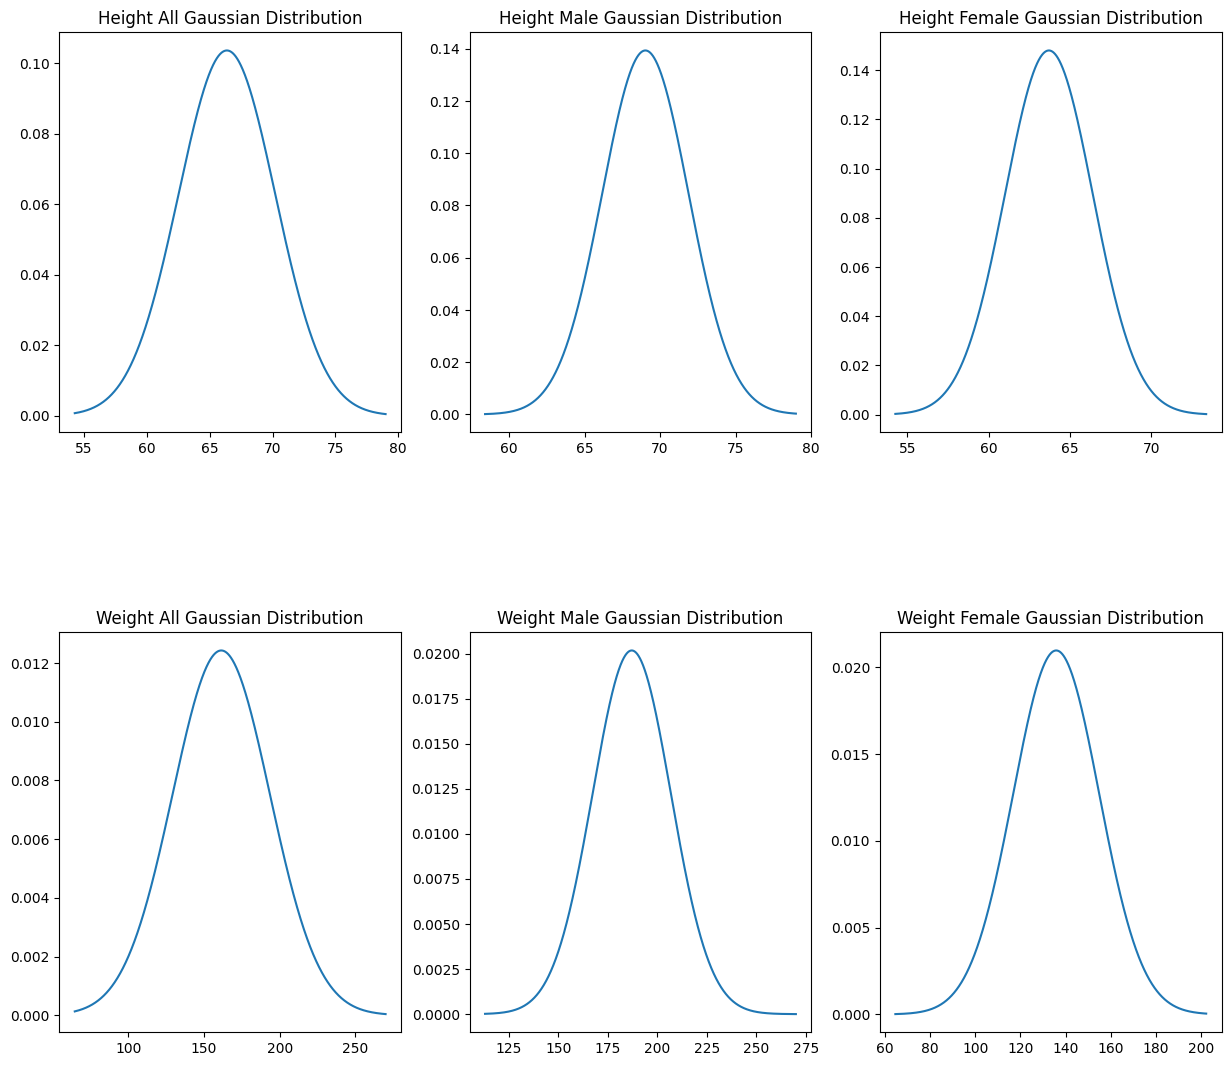

In [10]:
plt.figure(figsize=(15,10))
plt.subplots_adjust(right=0.9, top=1, bottom = 0, hspace = 0.5)

# Height All
n = len(df.Height)
x_values = np.arange(df.Height.min(), df.Height.max(),(df.Height.max()-df.Height.min())/n)

plt.subplot(231)
plt.plot(x_values, gau_height_all)
plt.title("Height All Gaussian Distribution")

# Height Male
n = len(df[male].Height)
x_values = np.arange(df[male].Height.min(), df[male].Height.max(),(df[male].Height.max()-df[male].Height.min())/n)

plt.subplot(232)
plt.plot(x_values, gau_height_male)
plt.title("Height Male Gaussian Distribution")

# Height Female
n = len(df[female].Height)
x_values = np.arange(df[female].Height.min(), df[female].Height.max(),(df[female].Height.max()-df[female].Height.min())/n)

plt.subplot(233)
plt.plot(x_values, gau_height_female)
plt.title("Height Female Gaussian Distribution")

# Weight All
n = len(df.Weight)
x_values = np.arange(df.Weight.min(), df.Weight.max(),(df.Weight.max()-df.Weight.min())/n)

plt.subplot(234)
plt.plot(x_values, gau_weight_all)
plt.title("Weight All Gaussian Distribution")

# Weight Male
n = len(df[male].Weight)
x_values = np.arange(df[male].Weight.min(), df[male].Weight.max(),(df[male].Weight.max()-df[male].Weight.min())/n)

plt.subplot(235)
plt.plot(x_values, gau_weight_male)
plt.title("Weight Male Gaussian Distribution")

# Weight Female
n = len(df[female].Weight)
x_values = np.arange(df[female].Weight.min(), df[female].Weight.max(),(df[female].Weight.max()-df[female].Weight.min())/n)

plt.subplot(236)
plt.plot(x_values, gau_weight_female)
plt.title("Weight Female Gaussian Distribution")

#  ChatGPT prompts

Now solve the same task with ChatGPT with the following prompts:


1.   Let's suppose you are given a csv file that has the Weight and Height of Males and Females. Can you provide a code to load this csv file?
2.   With the loaded file, please plot the histogram for height all (both female and male), height male, height female, weight all, weight female, weight male.
3.   With the same dataset, can you plot kernel density estimation and Gaussian distribution with MLE for these categories: height all (both female and male), height male, height female, weight all, weight female, weight male? Please do not use any specialized library to compute the kernel density estimation and the Gaussian distribution with MLE, do it from scratch.

**Paste the answer provided and run the code below:**

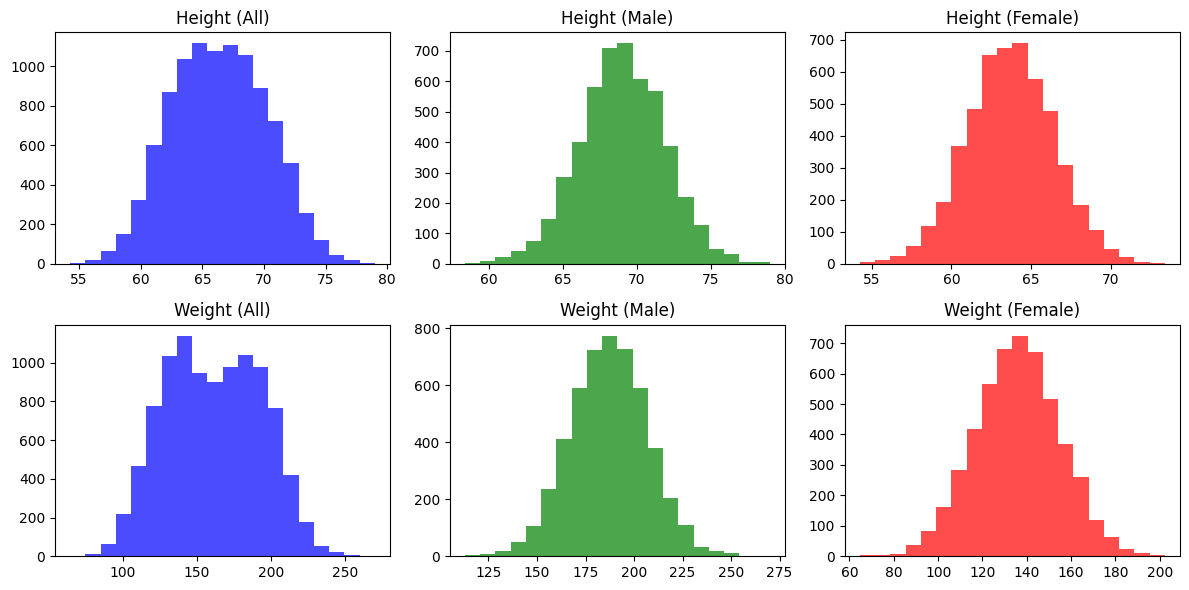

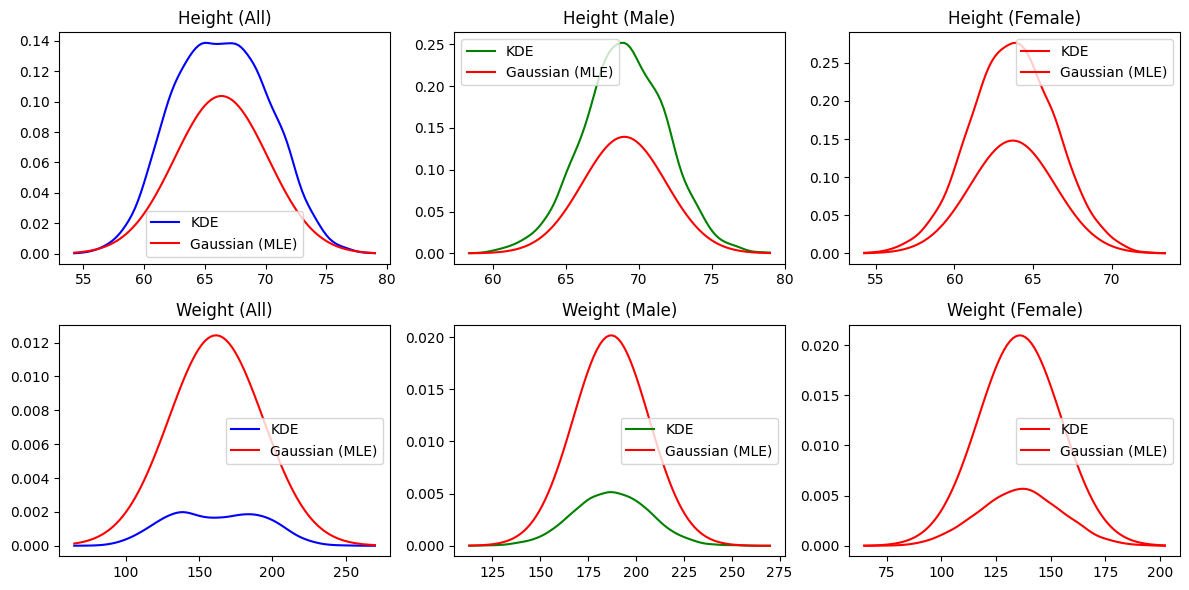

In [11]:
import csv
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Load the CSV file
data = {"Height": {"Male": [], "Female": []}, "Weight": {"Male": [], "Female": []}}

with open('/content/drive/MyDrive/ML/weight-height.csv', 'r') as csv_file:
    csv_reader = csv.DictReader(csv_file)
    for row in csv_reader:
        gender = row['Gender']
        height = float(row['Height'])
        weight = float(row['Weight'])

        data['Height'][gender].append(height)
        data['Weight'][gender].append(weight)

# Step 2: Plot Histograms
plt.figure(figsize=(12, 6))

plt.subplot(2, 3, 1)
plt.hist(data['Height']['Male'] + data['Height']['Female'], bins=20, color='b', alpha=0.7)
plt.title('Height (All)')

plt.subplot(2, 3, 2)
plt.hist(data['Height']['Male'], bins=20, color='g', alpha=0.7)
plt.title('Height (Male)')

plt.subplot(2, 3, 3)
plt.hist(data['Height']['Female'], bins=20, color='r', alpha=0.7)
plt.title('Height (Female)')

plt.subplot(2, 3, 4)
plt.hist(data['Weight']['Male'] + data['Weight']['Female'], bins=20, color='b', alpha=0.7)
plt.title('Weight (All)')

plt.subplot(2, 3, 5)
plt.hist(data['Weight']['Male'], bins=20, color='g', alpha=0.7)
plt.title('Weight (Male)')

plt.subplot(2, 3, 6)
plt.hist(data['Weight']['Female'], bins=20, color='r', alpha=0.7)
plt.title('Weight (Female)')

plt.tight_layout()

# Step 3: Calculate Kernel Density Estimation (KDE) and Gaussian Distribution with MLE
def kernel_density_estimation(data):
    n = len(data)
    h = 1.06 * np.std(data) * n ** (-1 / 5)  # Silverman's rule of thumb for bandwidth
    x = np.linspace(min(data), max(data), 100)
    kde = sum((1 / (np.sqrt(2 * np.pi) * h)) * np.exp(-(x - xi) ** 2 / (2 * h ** 2)) for xi in data)
    return x, kde / (n * h)

def gaussian_mle(data):
    mean = np.mean(data)
    std_dev = np.std(data)
    x = np.linspace(min(data), max(data), 100)
    pdf = (1 / (std_dev * np.sqrt(2 * np.pi))) * np.exp(-(x - mean) ** 2 / (2 * std_dev ** 2))
    return x, pdf

plt.figure(figsize=(12, 6))

plt.subplot(2, 3, 1)
x, kde = kernel_density_estimation(data['Height']['Male'] + data['Height']['Female'])
plt.plot(x, kde, 'b', label='KDE')
x, pdf = gaussian_mle(data['Height']['Male'] + data['Height']['Female'])
plt.plot(x, pdf, 'r', label='Gaussian (MLE)')
plt.title('Height (All)')
plt.legend()

plt.subplot(2, 3, 2)
x, kde = kernel_density_estimation(data['Height']['Male'])
plt.plot(x, kde, 'g', label='KDE')
x, pdf = gaussian_mle(data['Height']['Male'])
plt.plot(x, pdf, 'r', label='Gaussian (MLE)')
plt.title('Height (Male)')
plt.legend()

plt.subplot(2, 3, 3)
x, kde = kernel_density_estimation(data['Height']['Female'])
plt.plot(x, kde, 'r', label='KDE')
x, pdf = gaussian_mle(data['Height']['Female'])
plt.plot(x, pdf, 'r', label='Gaussian (MLE)')
plt.title('Height (Female)')
plt.legend()

plt.subplot(2, 3, 4)
x, kde = kernel_density_estimation(data['Weight']['Male'] + data['Weight']['Female'])
plt.plot(x, kde, 'b', label='KDE')
x, pdf = gaussian_mle(data['Weight']['Male'] + data['Weight']['Female'])
plt.plot(x, pdf, 'r', label='Gaussian (MLE)')
plt.title('Weight (All)')
plt.legend()

plt.subplot(2, 3, 5)
x, kde = kernel_density_estimation(data['Weight']['Male'])
plt.plot(x, kde, 'g', label='KDE')
x, pdf = gaussian_mle(data['Weight']['Male'])
plt.plot(x, pdf, 'r', label='Gaussian (MLE)')
plt.title('Weight (Male)')
plt.legend()

plt.subplot(2, 3, 6)
x, kde = kernel_density_estimation(data['Weight']['Female'])
plt.plot(x, kde, 'r', label='KDE')
x, pdf = gaussian_mle(data['Weight']['Female'])
plt.plot(x, pdf, 'r', label='Gaussian (MLE)')
plt.title('Weight (Female)')
plt.legend()

plt.tight_layout()
plt.show()


# Report



1.   What are some differences you notice between your code and ChatGPT's? (Name at least 3)
2.   Ask ChatGPT which parameters are the best for the histogram plot. Paste the answer here. Do you agree with ChatGPT's statement? Why yes or why not?
3.   Ask ChatGPT which parameters are the best for the KDE and Gaussian plot. Paste the answer here. Do you agree with ChatGPT's statement? Why yes or why not?
4.   Conclude with some thoughts and things you learned from this homework.

1. The three differences between my code and ChatGPT's code
- The difference in drawing the histogram. I didn't specify any bin size or alpha or color to picture the histogram. ChatGPT's code specifies the bin size, so the shape looks similar, but since the accumulated value should be different, the maximum value on the y-axis is different.
- I was surprised that my code for calculating kernel density estimation looks really similar to ChatGPT’s code. According to Wikipedia and a blog about kernel density estimation, I choose specific bandwidth. Apparently, the optimal choice for h (the bandwidth that minimizes the mean integrated squared error) is 1.06(standard deviation) -1/5th power [https://archive.org/details/densityestimatio00silv_0/page/44/mode/2up]. Therefore, I chose the same bandwidth calculation function with ChatGPT’s code since both of us chose the Gaussian distribution. However, the way to arrange the x values was different. ChatGPT’s code tries to use np.linspace(min(data), max(data), 100), which is an array of 100 evenly spaced values that span the range from the minimum to the maximum value found in the data array. However, I try to arrange the x values using np.arange and the step size is maximum value + minimum value of height or weight divided by the number of data.
- Also, I tried to calculate h, x, and n values for the kernel density estimation just once for each category, outside of the code to see the calculation well. However, ChatGPT code tries to deal values like h, x, and n within the defined function, and it is more clear.
- The calculation of the Gaussian distribution is similar, too. Since Gaussian distribution is defined, both calculations used mean and standard deviation. Both code uses np.mean and np.std to calculate mean and standard deviation. The difference is a way to calculate the x value as well.

2. ChatGPT’s answer: <br>

The choice of parameters for creating a histogram plot depends on the specific data you are working with and your visualization goals. Here are some key parameters to consider when creating a histogram plot:
  1. **Data:** The first parameter is, of course, the data itself. You need to provide the dataset for which you want to create a histogram.
  2. **Number of Bins:** The number of bins determines how many bars or columns your histogram will have. Choosing an appropriate number of bins is important to reveal the underlying distribution of your data. Too few bins may oversimplify the distribution, while too many bins may introduce noise. There are various methods to estimate the optimal number of bins, such as the Freedman-Diaconis rule or Scott's rule, or you can experiment to see what works best for your data.
  3. **Bin Range:** You can specify the range of values that you want to include in your histogram. For example, you may want to limit the histogram to a certain range of values to focus on a specific portion of your data.
  4. **Normalization:** Histograms can be either "count" histograms (showing the number of data points in each bin) or "probability density" histograms (where the area under the histogram sums to 1, representing probabilities). You can choose whether or not to normalize the histogram.
  5. **Histogram Type:** There are different types of histograms, such as "regular" histograms, cumulative histograms, and stacked histograms. Choose the type that best suits your visualization needs.
  6. **Colors and Styles:** You can customize the colors and styles of the bars in your histogram to make it visually appealing and informative. This includes choosing colors, line styles, and markers for the bars.
  7. **Labels and Titles:** Adding appropriate labels for the x-axis, y-axis, and a title for the plot is essential for clear communication of the data.
  8. **Axis Limits:** You may want to set specific limits for the x and y axes to focus on a particular range or to ensure that the plot displays the data effectively.
  9. **Grid Lines:** Adding grid lines can help readers interpret the values in your histogram more easily.
  10. **Legend:** If you have multiple datasets or categories within your histogram, you might want to include a legend to distinguish them.
  11. **Transparency:** You can adjust the transparency of the bars to reduce clutter when dealing with overlapping data.
  12. **Data Preprocessing:** Depending on the nature of your data, you might need to preprocess it, such as handling missing values or outliers, before creating the histogram.
  Ultimately, the best parameters for a histogram plot depend on your specific data and the story you want to tell with the visualization. It's often a good practice to experiment with different parameter settings and visualize the histogram to see which representation provides the most insight into your data distribution.

  My Answer: It is true that there are many parameters to plot the histogram. “The histogram is a popular graphing tool. It is used to summarize discrete or continuous data that are measured on an interval scale. It is often used to illustrate the major features of the distribution of the data in a convenient form.” [https://www150.statcan.gc.ca/n1/edu/power-pouvoir/ch9/histo/5214822-eng.htm]. The number of Bins, Bin Range, Normalization, or Histogram Type are the parameter that needs to be considered to plot the data well with the histogram. I think the number of bins, bin range, and normalizations is the parameter that is important because those factors change how the histogram looks and shows data. However, I don’t think Colors and Styles, Axis Limits, or Grid Lines are the parameters that are not that important. The conclusion of ChatGPT, which is the best parameter for a histogram plot depends on your specific data and the story you want to tell with the visualization, is true, but it is so general answer and didn’t actually mention which parameters are the best. It just gave that can be accepted easily with “high probability”.

3. ChatGPT’s answer: When creating a Kernel Density Estimation (KDE) plot or a Gaussian plot (which often represents a normal distribution), the choice of parameters depends on your data and visualization goals. Below are key parameters to consider when generating these types of plots:<br>
For KDE (Kernel Density Estimation) Plot
  Data: Start by providing the dataset for which you want to estimate the probability density.
  Kernel Function: The choice of kernel function determines the shape of the estimated density. Common choices include Gaussian (default), Epanechnikov, and others. The Gaussian kernel is often a good default choice.
  Bandwidth: The bandwidth parameter controls the smoothness of the KDE plot. A smaller bandwidth results in a more peaked, less smooth KDE, while a larger bandwidth results in a smoother, broader KDE. The optimal bandwidth depends on the data; you can use methods like Scott's rule or Silverman's rule to estimate bandwidth, or experiment with different values.
  Normalization: You can choose to normalize the KDE plot so that the area under the curve equals 1, representing a probability density.
  Kernel Scaling: Some libraries or tools allow you to scale the kernel based on the number of data points. This can be important when dealing with datasets of varying sizes.
  Plot Style and Color: Customize the appearance of the KDE plot by selecting colors, line styles, and markers that best suit your visualization needs.
  Labels and Titles: Add appropriate labels for the x-axis, y-axis, and a title for the plot to convey the purpose of the visualization.<br>
For Gaussian Plot (Normal Distribution):
  Mean (μ) and Standard Deviation (σ): The parameters of a Gaussian plot are typically the mean (center) and standard deviation (spread) of the normal distribution. These parameters define the location and shape of the Gaussian curve.
  Range: Specify the range of values you want to plot. The Gaussian distribution extends infinitely in both directions, but you may want to limit the range to focus on a specific portion of the curve.
  Number of Points: Decide how many points or data values you want to generate along the curve to create a smooth representation.
  Plot Style and Color: Customize the appearance of the Gaussian plot, such as choosing colors and line styles that match your visualization theme.
  Labels and Titles: Include clear labels and a title to explain the meaning of the plot, such as indicating that it represents a Gaussian distribution.
  Axis Limits: Set appropriate limits for the x-axis and y-axis to ensure that the plot displays the Gaussian distribution effectively.<br>
The specific parameters and their values should be chosen based on your data and the context of your analysis. For KDE, experimenting with different bandwidths and kernel functions is often necessary to find the most informative representation of the data. For Gaussian plots, ensure that the mean and standard deviation accurately represent the underlying distribution you want to depict.<br><br>
My answer: The ChatGPT’s answer is similar to the previous answer. It simply lists the parameters of KDE and Gaussian Distribution. However, I think the ChatGPT indirectly and directly answers which is the best parameter. For the part “For Gaussian plots, ensure that the mean and standard deviation accurately represent the underlying distribution you want to depict”, I agreed with that, and ChatGPT finally answered with the specific parameter. For the Gaussian Plot, the mean and the standard deviation is the key to representing Gaussian Distribution. Due to the change in the mean and standard deviation, the Gaussian Distribution’s location and shape were decided. For the part of KDE, it mentioned: “experimenting with different bandwidths and kernel functions is often necessary to find the most informative representation of the data”. I also think it is true. During the coding exercises, I tried within many bandwidth values, and the smoothness of the curve changed because of bandwidth even with the same data. Also, there are many kernel functions. [https://scikit-learn.org/stable/modules/density.html]. Kernel functions will change the shape of the density estimation. Finding the proper kernel function is important.

4. I’ve learned many things. Especially, it was interesting there were many choices for kernel function in the kernel estimation, such as Gaussian, Tophat, Epanechnikov, Exponential, Linear, or Cosine Kernel. Also, seeing how the decision of bandwidth affects the smoothness of the curve was another thing that I could see with the assignments.
Within the previous two questions, I could see how ChatGPT tries to answer the questions. It tries to generate acceptable answers, subsequently, it provides general answers. Also, since it is trying to generate the highest probable answer by previous words, it sometimes just gives understandable, but irrelevant answers.
